In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# formatting the notebook display
pd.set_option('display.max_columns',None)


In [2]:
data = pd.read_csv('/content/employee_data (1).csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
rows, cols = data.shape
print(f'The dataset has {rows} rows and {cols} columns')

The dataset has 1470 rows and 35 columns


In [4]:
# checking the data type and missing values with sample data
# datafrom for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# dataframe for missing value %
data_missing =  pd.DataFrame(round(data.isnull().mean()*100,2),
                             columns = ['Missing_percent'])

# dataframe for sample value
sample_data = pd.DataFrame(data.head(2).T)

# renaming the columns
sample_data.rename(columns = {0:'Sample_1',
                              1:'Sample_2'},inplace = True)

# concat the above dataframe
data_concat = pd.concat([data_missing, data_type, sample_data],axis = 1)
data_concat

,Missing_percent,Data_type,Sample_1,Sample_2
Age,0.0,int64,41,49
Attrition,0.0,object,Yes,No
BusinessTravel,0.0,object,Travel_Rarely,Travel_Frequently
DailyRate,0.0,int64,1102,279
Department,0.0,object,Sales,Research & Development
DistanceFromHome,0.0,int64,1,8
Education,0.0,int64,2,1
EducationField,0.0,object,Life Sciences,Life Sciences
EmployeeCount,0.0,int64,1,1
EmployeeNumber,0.0,int64,1,2


In [5]:
# number of categorical and numerical features
obj, num = 0,0
for cols in data.columns:
  if data[cols].dtype == 'O':
    obj+=1
  else:
    num+=1
print(f'The data has {num} numerical and {obj} categorical fetaures')

The data has 26 numerical and 9 categorical fetaures


In [6]:
# data duplicate handling
print(f'The data has {data[data.duplicated()].shape[0]} duplicated rows')

The data has 0 duplicated rows


In [7]:
# understanding the categorical data
for attribute in data.columns:
  if data[attribute].dtype =='O':
    if data[attribute].nunique() == 1:
      print(f'***{attribute} has 1 unique vlaues***')
    else:
      print(f'{attribute} has {data[attribute].nunique()} unique values')

Attrition has 2 unique values
BusinessTravel has 3 unique values
Department has 3 unique values
EducationField has 6 unique values
Gender has 2 unique values
JobRole has 9 unique values
MaritalStatus has 3 unique values
***Over18 has 1 unique vlaues***
OverTime has 2 unique values


In [8]:
# delete the columns with 1 unique values
del data['Over18']

In [9]:
# understanding the numerical data
for attribute in data.columns:
  if data[attribute].dtype != 'O':
    if data[attribute].nunique() == 1:
      print(f'**{attribute} has 1 unique values***')
    else:
      print(f'{attribute} has {data[attribute].nunique()} unique values')


Age has 43 unique values
DailyRate has 886 unique values
DistanceFromHome has 29 unique values
Education has 5 unique values
**EmployeeCount has 1 unique values***
EmployeeNumber has 1470 unique values
EnvironmentSatisfaction has 4 unique values
HourlyRate has 71 unique values
JobInvolvement has 4 unique values
JobLevel has 5 unique values
JobSatisfaction has 4 unique values
MonthlyIncome has 1349 unique values
MonthlyRate has 1427 unique values
NumCompaniesWorked has 10 unique values
PercentSalaryHike has 15 unique values
PerformanceRating has 2 unique values
RelationshipSatisfaction has 4 unique values
**StandardHours has 1 unique values***
StockOptionLevel has 4 unique values
TotalWorkingYears has 40 unique values
TrainingTimesLastYear has 7 unique values
WorkLifeBalance has 4 unique values
YearsAtCompany has 37 unique values
YearsInCurrentRole has 19 unique values
YearsSinceLastPromotion has 16 unique values
YearsWithCurrManager has 18 unique values


In [14]:
# deleting the numerical columns with 1 unique values
# the employee number looks like an id column
data.drop(columns = ['EmployeeCount','StandardHours','EmployeeNumber'],axis = 1, inplace = True)

In [15]:
for attribute in data.columns:
  print(attribute)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [16]:
rows,cols = data.shape
print(f'The data has {rows} rows and {cols} columns')

The data has 1470 rows and 31 columns


In [19]:
# anlyzing the dependent/target attribute
round(data['Attrition'].value_counts(normalize = True)*100,2)

,proportion
Attrition,
No,83.88
Yes,16.12


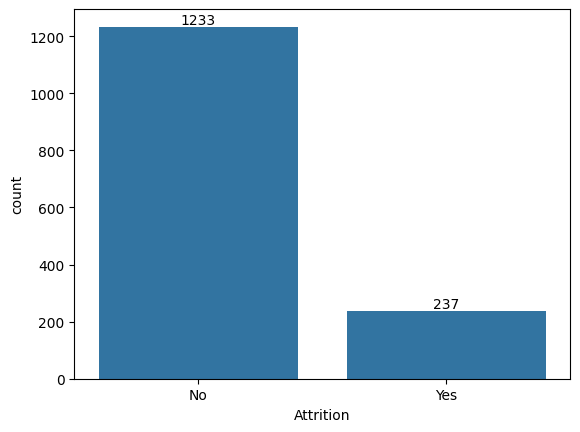

In [23]:
# plotting the graph for attrition
ax = sns.countplot(x = data['Attrition'],
                   order = data['Attrition'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

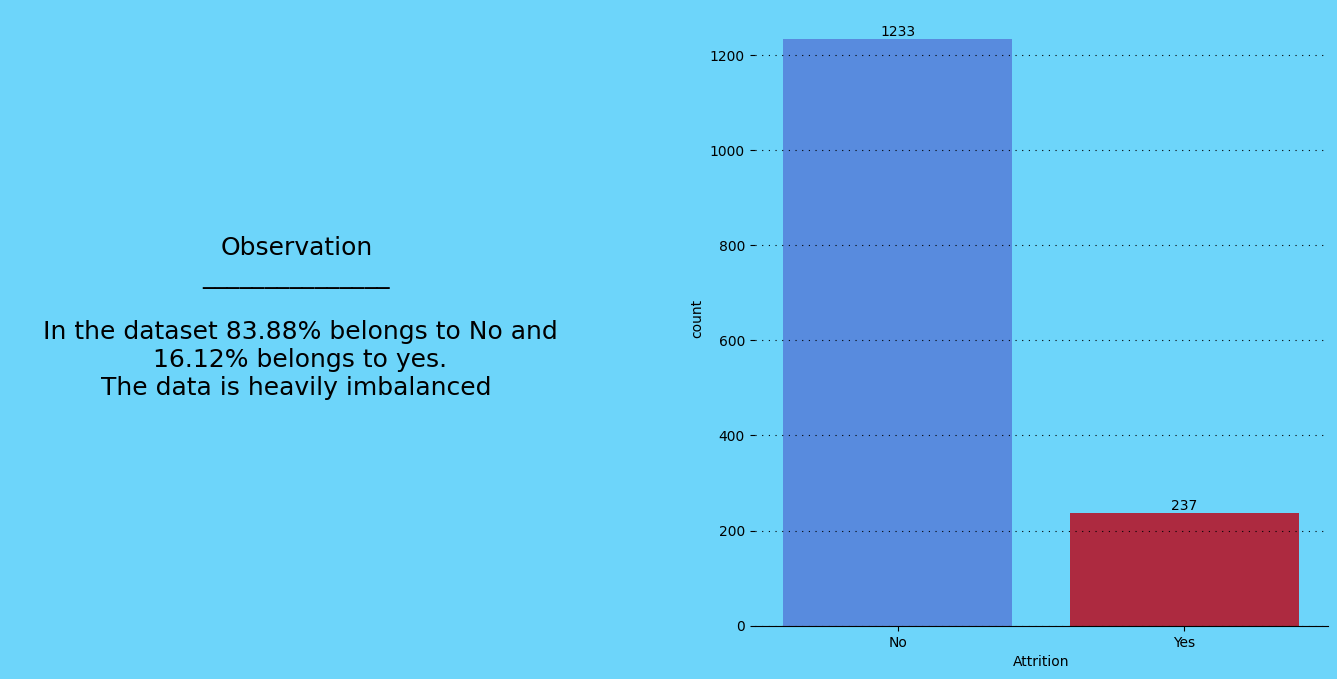

In [40]:
# creating a plot structure
fig = plt.figure(figsize = (17, 8))
spec = fig.add_gridspec(1,2)
spec.update(wspace = 0.3, hspace = 0.15)
sec_1= fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# adding the color
bg_color = '#6DD5FA'
for selection in [fig, sec_1,sec_2]:
  selection.set_facecolor(bg_color)

# graph for attrition
ax = sns.countplot(x = data['Attrition'],
                            order= data['Attrition'].value_counts().index,
                            palette = ['#4286f4','#c31432'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
sec_2.grid(color = 'black', axis = 'y', ls =':', dashes = (1,5))

# narrating the story
max, min = round(data['Attrition'].value_counts(normalize = True)*100, 2)
sec_1.text(0.5, 0.5, f'Observation\n_______________\n\n In the dataset {max}% belongs to No and\n {min}% belongs to yes.\nThe data is heavily imbalanced',
           va = 'center',ha= 'center',size = 18)

# remove the axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left','right','top','bottom']:
  for section in [sec_1,sec_2]:
    if position =='bottom' and section ==sec_2:
      continue
    else:
      section.spines[position].set_visible(False)


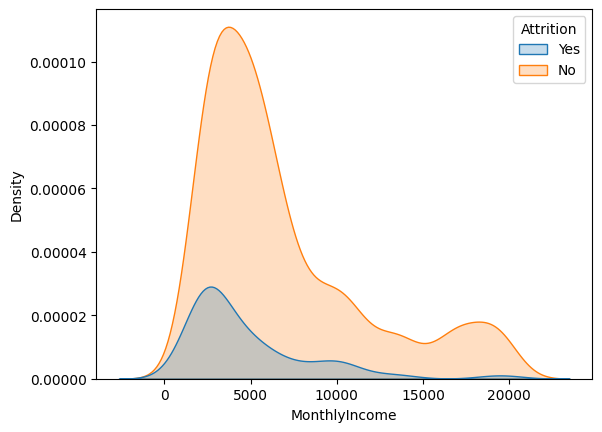

In [35]:
# comparing the proportion of distribution of targets across numerical classes
sns.kdeplot(x='MonthlyIncome', fill = True, hue = 'Attrition', data= data)
plt.show()